In [91]:
import pandas as pd
import numpy as np
import torch

In [92]:
X = torch.load('torch_data/X_padded.pt')
y = torch.load('torch_data/y_padded.pt')

In [93]:
X.shape, y.shape

((36268, 4, 60), (36268, 1, 60))

In [65]:
y[y == 0.] = 99999
y[y < 9999.] = 1
y[y > 9999.] = 0

In [103]:
X[0]

array([[ 148. ,  168. ,  184. ,  173. ,  162. ,  189.5,  182.5,  163.5,
         195. ,  139.5,  140.5,  144.5,  156. ,  185. ,  198. ,  160.5,
         183. ,  191. ,  168. ,  141. ,  153. ,  168.5,  166.5,  218. ,
         191.5,  194. ,  174.5,  164. ,  170. ,  175. ,  166.5,   36.2,
         122. , 9999. , 9999. , 9999. , 9999. , 9999. , 9999. , 9999. ,
        9999. , 9999. , 9999. , 9999. , 9999. , 9999. , 9999. , 9999. ,
        9999. , 9999. , 9999. , 9999. , 9999. , 9999. , 9999. , 9999. ,
        9999. , 9999. , 9999. , 9999. ],
       [  33. ,  125. ,  157. ,   18. ,  152. ,   49. ,   32. ,  299. ,
          67. ,   63. ,  234. ,  383. ,   46. ,  188. ,   81. ,  200. ,
          31. ,  227. ,   47. ,  295. ,  239. ,   18. ,   13. ,  142. ,
         302. ,   73. ,  390. ,  250. ,  444. ,  314. ,   77. ,  135. ,
          11. , 9999. , 9999. , 9999. , 9999. , 9999. , 9999. , 9999. ,
        9999. , 9999. , 9999. , 9999. , 9999. , 9999. , 9999. , 9999. ,
        9999. , 9999. ,

In [68]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers.experimental.preprocessing import Normalization

In [99]:
def init_model():
    metric = metrics.MAPE
    opt = optimizers.RMSprop(learning_rate=0.01)
    
    #normalizer = Normalization()
    #normalizer.adapt(X)
    
    model = models.Sequential()
    model.add(layers.Masking(mask_value=9999., input_shape=(4,60)))
    #model.add(normalizer)
    model.add(layers.LSTM(20, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(10, return_sequences=True, activation='tanh'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='mse',
                  optimizer=opt,
                  metrics = [metric])
    
    return model

In [100]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_14 (Masking)        (None, 4, 60)             0         
                                                                 
 normalization_14 (Normaliza  (None, 4, 60)            121       
 tion)                                                           
                                                                 
 lstm_23 (LSTM)              (None, 4, 20)             6480      
                                                                 
 lstm_24 (LSTM)              (None, 4, 10)             1240      
                                                                 
 dense_28 (Dense)            (None, 4, 50)             550       
                                                                 
 dense_29 (Dense)            (None, 4, 1)              51        
                                                     

In [101]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', verbose=1, patience=10, restore_best_weights=True)

model = init_model()

history = model.fit(X, y, epochs=100, validation_split=0.2, 
            batch_size=64,
            callbacks=[es], verbose=2)

Epoch 1/100
454/454 - 8s - loss: 28153326.0000 - mean_absolute_percentage_error: 1019195424768.0000 - val_loss: 26917756.0000 - val_mean_absolute_percentage_error: 1405440360448.0000 - 8s/epoch - 18ms/step
Epoch 2/100
454/454 - 2s - loss: 22480124.0000 - mean_absolute_percentage_error: 1853998366720.0000 - val_loss: 26321518.0000 - val_mean_absolute_percentage_error: 1359383363584.0000 - 2s/epoch - 4ms/step
Epoch 3/100
454/454 - 2s - loss: 22309942.0000 - mean_absolute_percentage_error: 1856004816896.0000 - val_loss: 27691404.0000 - val_mean_absolute_percentage_error: 1231883993088.0000 - 2s/epoch - 4ms/step
Epoch 4/100
454/454 - 2s - loss: 22268834.0000 - mean_absolute_percentage_error: 1849241501696.0000 - val_loss: 26185442.0000 - val_mean_absolute_percentage_error: 1354163290112.0000 - 2s/epoch - 4ms/step
Epoch 5/100
454/454 - 2s - loss: 22234144.0000 - mean_absolute_percentage_error: 1849094701056.0000 - val_loss: 25897962.0000 - val_mean_absolute_percentage_error: 1379234611200.0

KeyboardInterrupt: 

In [49]:
history.history

{'loss': [34356968.0,
  24494996.0,
  16713496.0,
  15075442.0,
  15033100.0,
  15030301.0,
  15029687.0,
  15029394.0,
  15029253.0,
  15029116.0,
  15029027.0,
  15028953.0,
  15028918.0,
  15028885.0,
  15028829.0,
  15028805.0,
  15028790.0],
 'mean_squared_error': [34356968.0,
  24494996.0,
  16713496.0,
  15075442.0,
  15033100.0,
  15030301.0,
  15029687.0,
  15029394.0,
  15029253.0,
  15029116.0,
  15029027.0,
  15028953.0,
  15028918.0,
  15028885.0,
  15028829.0,
  15028805.0,
  15028790.0],
 'val_loss': [45338640.0,
  26658382.0,
  17907072.0,
  17456198.0,
  17448940.0,
  17440516.0,
  17439674.0,
  17450650.0,
  17441042.0,
  17441914.0,
  17440762.0,
  17439960.0,
  17440532.0,
  17440828.0,
  17439944.0,
  17439718.0,
  17440314.0],
 'val_mean_squared_error': [45338640.0,
  26658382.0,
  17907072.0,
  17456198.0,
  17448940.0,
  17440516.0,
  17439674.0,
  17450650.0,
  17441042.0,
  17441914.0,
  17440762.0,
  17439960.0,
  17440532.0,
  17440828.0,
  17439944.0,
  174

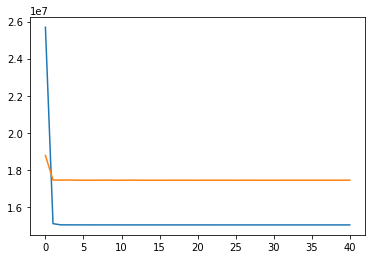

In [59]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])

In [51]:
df = pd.read_csv('merged_treated.csv', index_col=[0])
df.head()

,name,year,type,date,result,gc,icon,race_ref,race_name,race_detail,...,distance,points,Avg. speed winner:,Distance:,Parcours type:,ProfileScore:,Vert. meters:,Startlist quality score:,Won how:,adjusted_points
0,egan-bernal,2020,etappe,2020-09-16,0,NaN,stage,race/tour-de-france/2020/stage-17,tour-de-france,Stage 17 - Grenoble › Méribel - Col de la Loze,...,170.0,0.0,35.28,170.0,mo_mo,444.0,4430.0,1685,3.5 km solo,0.0
1,andrey-amador,2020,etappe,2020-09-16,117,79.0,stage,race/tour-de-france/2020/stage-17,tour-de-france,Stage 17 - Grenoble › Méribel - Col de la Loze,...,170.0,0.0,35.28,170.0,mo_mo,444.0,4430.0,1685,3.5 km solo,0.0
2,richard-carapaz,2020,etappe,2020-09-16,11,13.0,stage,race/tour-de-france/2020/stage-17,tour-de-france,Stage 17 - Grenoble › Méribel - Col de la Loze,...,170.0,20.0,35.28,170.0,mo_mo,444.0,4430.0,1685,3.5 km solo,14962800.0
3,jonathan-castroviejo,2020,etappe,2020-09-16,116,40.0,stage,race/tour-de-france/2020/stage-17,tour-de-france,Stage 17 - Grenoble › Méribel - Col de la Loze,...,170.0,0.0,35.28,170.0,mo_mo,444.0,4430.0,1685,3.5 km solo,0.0
4,michal-kwiatkowski,2020,etappe,2020-09-16,130,37.0,stage,race/tour-de-france/2020/stage-17,tour-de-france,Stage 17 - Grenoble › Méribel - Col de la Loze,...,170.0,0.0,35.28,170.0,mo_mo,444.0,4430.0,1685,3.5 km solo,0.0


In [56]:
for i in df.name.unique()[:2]:
    print(i)

egan-bernal
andrey-amador


In [57]:
ls = []

for rider in df.name.unique()[:2]:
    ls.append(df_small[df_small['name']==rider])

In [ ]:
import numpy as np

def subsample_sequence(df, length):
        df_small[df_small['name']==rider]
        # $CHALLENGIFY_BEGIN
        last_possible = df.shape[0] - length - 5
        
        random_start = np.random.randint(0, last_possible)
        X = df[random_start: random_start+length].values
        y = df.iloc[random_start+length+1:random_start+length+21]['points']
        # $CHALLENGIFY_END
        return X, y

for rider in ls:
    X, y = subsample_sequence(rider, 365)

/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_9756/69888416.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_small[df_small['name']==rider]


: 

: 

In [ ]:
X

array([[13.8, 0.0, 13.0, 28.0, 1812, 'daniele-bennati'],
       [13.8, 0.0, 13.0, 28.0, 1812, 'roman-kreuziger'],
       [13.8, 0.0, 13.0, 28.0, 1812, 'rafal-majka'],
       ...,
       [155.0, 0.0, 323.0, 4282.0, 1073, 'marcel-wyss'],
       [155.0, 0.0, 323.0, 4282.0, 1073, 'dominik-nerz'],
       [155.0, 0.0, 323.0, 4282.0, 1073, 'jan-barta']], dtype=object)